In [70]:
# import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
#For Data  Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#For Machine Learning Algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os
df = pd.read_csv('online_retail_dataset.csv',low_memory=False)


In [71]:
df

df.head(5)
df.isnull().sum()

Country         0
Customer_ID     0
Description     0
Invoice Date    0
Item Code       0
Invoice ID      0
No of Rows      0
Unit Price      0
Quantity        0
Sales Amount    0
dtype: int64

In [72]:
df.isnull().sum().sum()

0

In [73]:
df.describe(include='object')

,Country,Description,Invoice Date,Item Code
count,146130,146130,146130,146130
unique,34,3240,147,3168
top,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,12/5/11,85123A
freq,129602,962,1753,962


In [74]:
df.describe(include='all')

,Country,Customer_ID,Description,Invoice Date,Item Code,Invoice ID,No of Rows,Unit Price,Quantity,Sales Amount
count,146130,146130.000000,146130,146130,146130,146130.000000,146130.0,146130.000000,146130.000000,146130.000000
unique,34,NaN,3240,147,3168,NaN,NaN,NaN,NaN,NaN
top,United Kingdom,NaN,WHITE HANGING HEART T-LIGHT HOLDER,12/5/11,85123A,NaN,NaN,NaN,NaN,NaN
freq,129602,NaN,962,1753,962,NaN,NaN,NaN,NaN,NaN
mean,NaN,15244.132711,NaN,NaN,NaN,549881.611360,1.0,3.255783,13.677349,22.993014
std,NaN,1726.232274,NaN,NaN,NaN,6313.232779,0.0,25.855016,199.682247,215.440885
min,NaN,12346.000000,NaN,NaN,NaN,539993.000000,1.0,0.000000,1.000000,0.000000
25%,NaN,13771.000000,NaN,NaN,NaN,544691.000000,1.0,1.250000,2.000000,5.040000
50%,NaN,15061.000000,NaN,NaN,NaN,549153.000000,1.0,1.950000,6.000000,12.750000
75%,NaN,16771.000000,NaN,NaN,NaN,553863.000000,1.0,3.750000,12.000000,19.800000


In [75]:
df.duplicated().sum()

1468

In [76]:
df.drop_duplicates(inplace=True)

In [77]:
df.duplicated().sum()

0

In [78]:
df = df.convert_dtypes()

In [79]:
df.info()
df.reset_index(drop=True, inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144662 entries, 0 to 146129
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country       144662 non-null  string 
 1   Customer_ID   144662 non-null  Int64  
 2   Description   144662 non-null  string 
 3   Invoice Date  144662 non-null  string 
 4   Item Code     144662 non-null  string 
 5   Invoice ID    144662 non-null  Int64  
 6   No of Rows    144662 non-null  Int64  
 7   Unit Price    144662 non-null  Float64
 8   Quantity      144662 non-null  Int64  
 9   Sales Amount  144662 non-null  Float64
dtypes: Float64(2), Int64(4), string(4)
memory usage: 13.0 MB


In [80]:
df.shape

(144662, 10)

## Checking Unique Values in Country and Customer ID

In [83]:
df['Country'].unique()
df['Customer_ID'].unique()
df['No of Rows'].unique()

<IntegerArray>
[1]
Length: 1, dtype: Int64

In [84]:
import pandas as pd
from pandas_profiling import ProfileReport

file = pd.read_csv("online_retail_dataset.csv")
profile = ProfileReport(file, title = "profile")
profile.to_file("Profile_report_retail_proj2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144662 entries, 0 to 144661
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country       144662 non-null  string 
 1   Customer_ID   144662 non-null  Int64  
 2   Description   144662 non-null  string 
 3   Invoice Date  144662 non-null  string 
 4   Item Code     144662 non-null  string 
 5   Invoice ID    144662 non-null  Int64  
 6   No of Rows    144662 non-null  Int64  
 7   Unit Price    144662 non-null  Float64
 8   Quantity      144662 non-null  Int64  
 9   Sales Amount  144662 non-null  Float64
dtypes: Float64(2), Int64(4), string(4)
memory usage: 11.9 MB


## Removing Rows that are not required for our Analysis

In [86]:
df.drop(['No of Rows'], axis = 1, inplace = True)

In [87]:
df

,Country,Customer_ID,Description,Invoice Date,Item Code,Invoice ID,Unit Price,Quantity,Sales Amount
0,Australia,12415,BISCUIT TIN VINTAGE RED,3/3/11,22842,545475,5.95,48,285.6
1,Australia,12415,ROUND CAKE TIN VINTAGE GREEN,3/3/11,22841,545475,6.95,36,250.2
2,Australia,12415,ROUND CAKE TIN VINTAGE RED,3/3/11,22840,545475,6.95,36,250.2
3,Australia,12415,3 TIER CAKE TIN RED AND CREAM,3/3/11,22838,545475,14.95,20,299.0
4,Australia,12415,3 TIER CAKE TIN GREEN AND CREAM,3/3/11,22839,545475,12.75,32,408.0
...,...,...,...,...,...,...,...,...,...
144657,United Kingdom,14178,GARDENERS KNEELING PAD CUP OF TEA,19-07-2011,23300,560555,1.65,2,3.3
144658,United Kingdom,14178,PINK DOUGHNUT TRINKET POT,19-07-2011,22064,560555,1.65,2,3.3
144659,United Kingdom,14178,SCANDINAVIAN PAISLEY PICNIC BAG,19-07-2011,21932,560555,1.65,2,3.3
144660,United Kingdom,16764,LUNCH BAG SPACEBOY DESIGN,19-07-2011,22382,560601,1.65,2,3.3


In [88]:
df['Invoice Date']= pd.to_datetime(df['Invoice Date'])
df['Order_Date'] = [d.date() for d in df['Invoice Date']]
df['Order_Time'] = [d.time() for d in df['Invoice Date']]
df.head()
df['Order_Date']= pd.to_datetime(df['Order_Date'])

/Users/jonathangabriel/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24-07-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/jonathangabriel/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26-04-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/jonathangabriel/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15-04-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/jonathangabriel/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.p

In [89]:
df

,Country,Customer_ID,Description,Invoice Date,Item Code,Invoice ID,Unit Price,Quantity,Sales Amount,Order_Date,Order_Time
0,Australia,12415,BISCUIT TIN VINTAGE RED,2011-03-03,22842,545475,5.95,48,285.6,2011-03-03,00:00:00
1,Australia,12415,ROUND CAKE TIN VINTAGE GREEN,2011-03-03,22841,545475,6.95,36,250.2,2011-03-03,00:00:00
2,Australia,12415,ROUND CAKE TIN VINTAGE RED,2011-03-03,22840,545475,6.95,36,250.2,2011-03-03,00:00:00
3,Australia,12415,3 TIER CAKE TIN RED AND CREAM,2011-03-03,22838,545475,14.95,20,299.0,2011-03-03,00:00:00
4,Australia,12415,3 TIER CAKE TIN GREEN AND CREAM,2011-03-03,22839,545475,12.75,32,408.0,2011-03-03,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
144657,United Kingdom,14178,GARDENERS KNEELING PAD CUP OF TEA,2011-07-19,23300,560555,1.65,2,3.3,2011-07-19,00:00:00
144658,United Kingdom,14178,PINK DOUGHNUT TRINKET POT,2011-07-19,22064,560555,1.65,2,3.3,2011-07-19,00:00:00
144659,United Kingdom,14178,SCANDINAVIAN PAISLEY PICNIC BAG,2011-07-19,21932,560555,1.65,2,3.3,2011-07-19,00:00:00
144660,United Kingdom,16764,LUNCH BAG SPACEBOY DESIGN,2011-07-19,22382,560601,1.65,2,3.3,2011-07-19,00:00:00


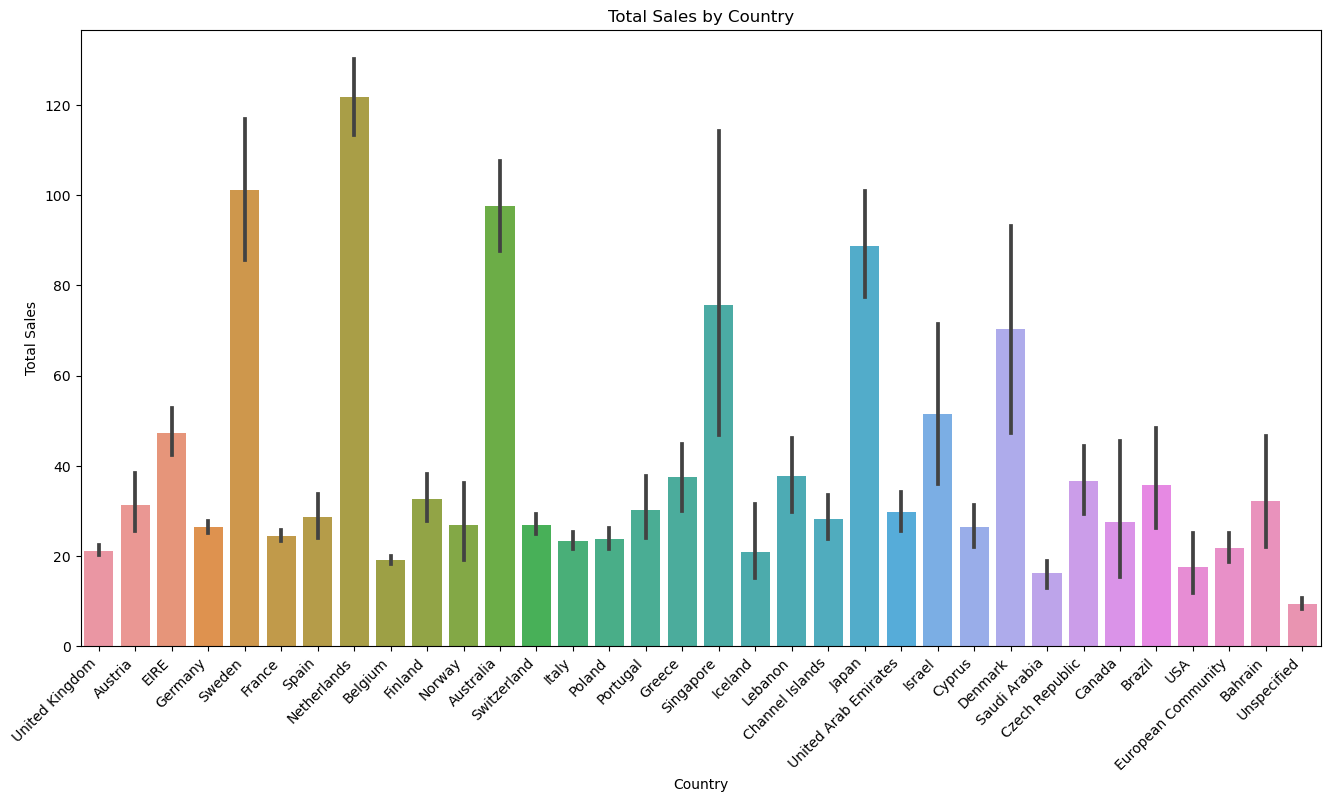

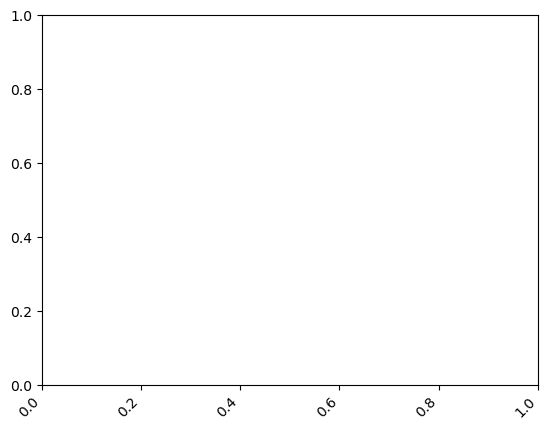

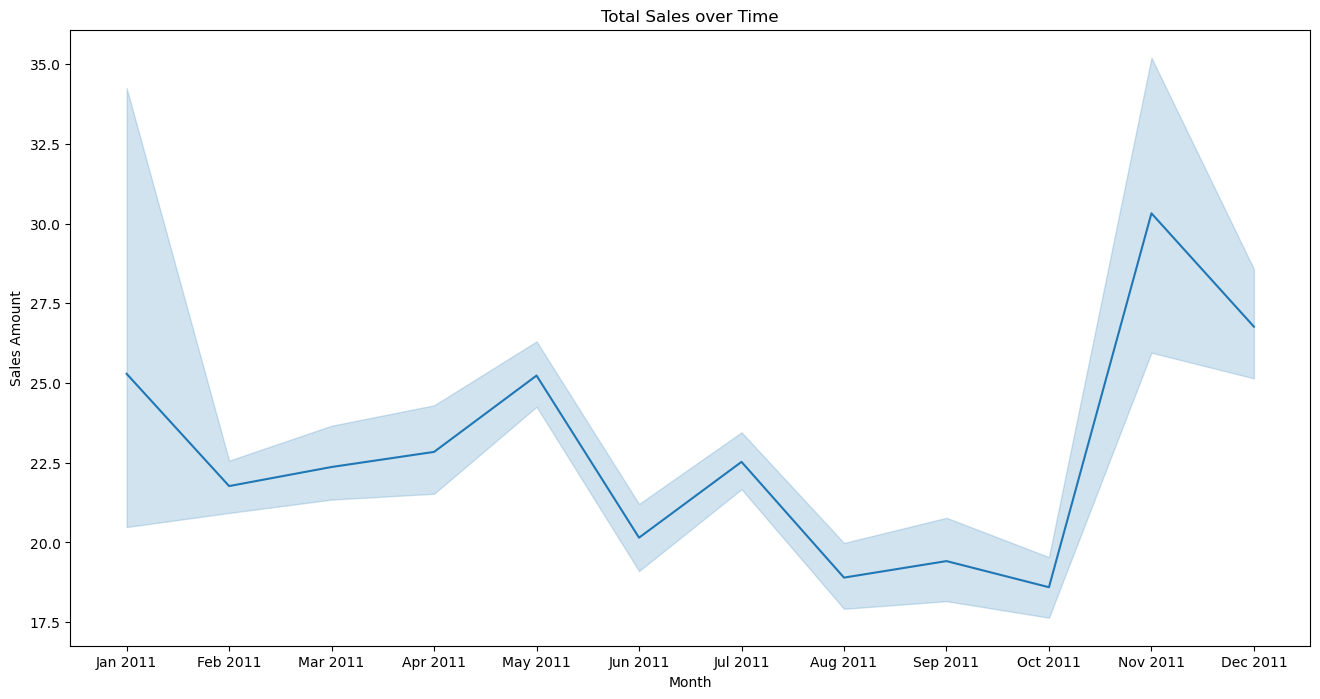

In [90]:
# Convert the "Invoice Date" column to datetime format
df["Invoice Date"] = pd.to_datetime(df["Invoice Date"])

# Add a "Month" column based on the "Invoice Date" column
df["Month"] = df["Invoice Date"].dt.strftime("%b %Y")

# Sort the data frame by the ordered "Month" column
df = df.sort_values(by="Invoice Date")

# Calculate the total sales amount for each customer
# df["Total Sales"] = df["Unit Price"] * df["Quantity"]

# set figure size
plt.figure(figsize=(16,8))

# create bar plot
sns.barplot(x="Country", y="Sales Amount", data= df )

# set plot title and axis labels
plt.title("Total Sales by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")


# rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# display plot
plt.show()

# format y-axis values with thousands separator and currency symbol
#plt.gca().yaxis.set_major_formatter('${x:,.0f}')

# rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# display plot
plt.show()

# set figure size
plt.figure(figsize=(16,8))


sns.lineplot(x="Month", y="Sales Amount", data=df)
plt.title("Total Sales over Time")
plt.show()


In [91]:
df

,Country,Customer_ID,Description,Invoice Date,Item Code,Invoice ID,Unit Price,Quantity,Sales Amount,Order_Date,Order_Time,Month
33841,United Kingdom,15240,RED SPOT CERAMIC DRAWER KNOB,2011-01-02,21671,542776,1.25,48,60.0,2011-01-02,00:00:00,Jan 2011
54836,United Kingdom,17356,HAPPY STENCIL CRAFT,2011-01-02,22563,542796,1.25,6,7.5,2011-01-02,00:00:00,Jan 2011
54837,United Kingdom,17356,MONSTERS STENCIL CRAFT,2011-01-02,22562,542796,1.25,6,7.5,2011-01-02,00:00:00,Jan 2011
54838,United Kingdom,17356,PACK OF 12 RED RETROSPOT TISSUES,2011-01-02,21980,542796,0.29,12,3.48,2011-01-02,00:00:00,Jan 2011
54839,United Kingdom,17356,PACK OF 12 LONDON TISSUES,2011-01-02,22616,542796,0.29,12,3.48,2011-01-02,00:00:00,Jan 2011
...,...,...,...,...,...,...,...,...,...,...,...,...
113086,United Kingdom,17576,DELUXE SEWING KIT,2011-12-07,22654,559824,5.95,1,5.95,2011-12-07,00:00:00,Dec 2011
113087,United Kingdom,17841,ZINC HERB GARDEN CONTAINER,2011-12-07,23091,559807,6.25,1,6.25,2011-12-07,00:00:00,Dec 2011
113088,United Kingdom,16365,DOORMAT MULTICOLOUR STRIPE,2011-12-07,48116,559821,7.95,1,7.95,2011-12-07,00:00:00,Dec 2011
113079,United Kingdom,16409,CHILDRENS CUTLERY RETROSPOT RED,2011-12-07,84997B,559809,4.15,1,4.15,2011-12-07,00:00:00,Dec 2011


In [92]:
## let's find Highest Total sales by Country

total_sales_by_country = df.groupby("Country")["Sales Amount"].sum().reset_index()

In [93]:
total_sales_by_country = total_sales_by_country.sort_values(by="Sales Amount", ascending=False)
total_sales_by_country 

,Country,Sales Amount
32,United Kingdom,2704916.772
10,EIRE,118091.87
21,Netherlands,104228.02
14,Germany,95345.8
13,France,73977.31
0,Australia,60311.51
27,Spain,30227.76
28,Sweden,19009.57
29,Switzerland,18205.98
19,Japan,17584.06


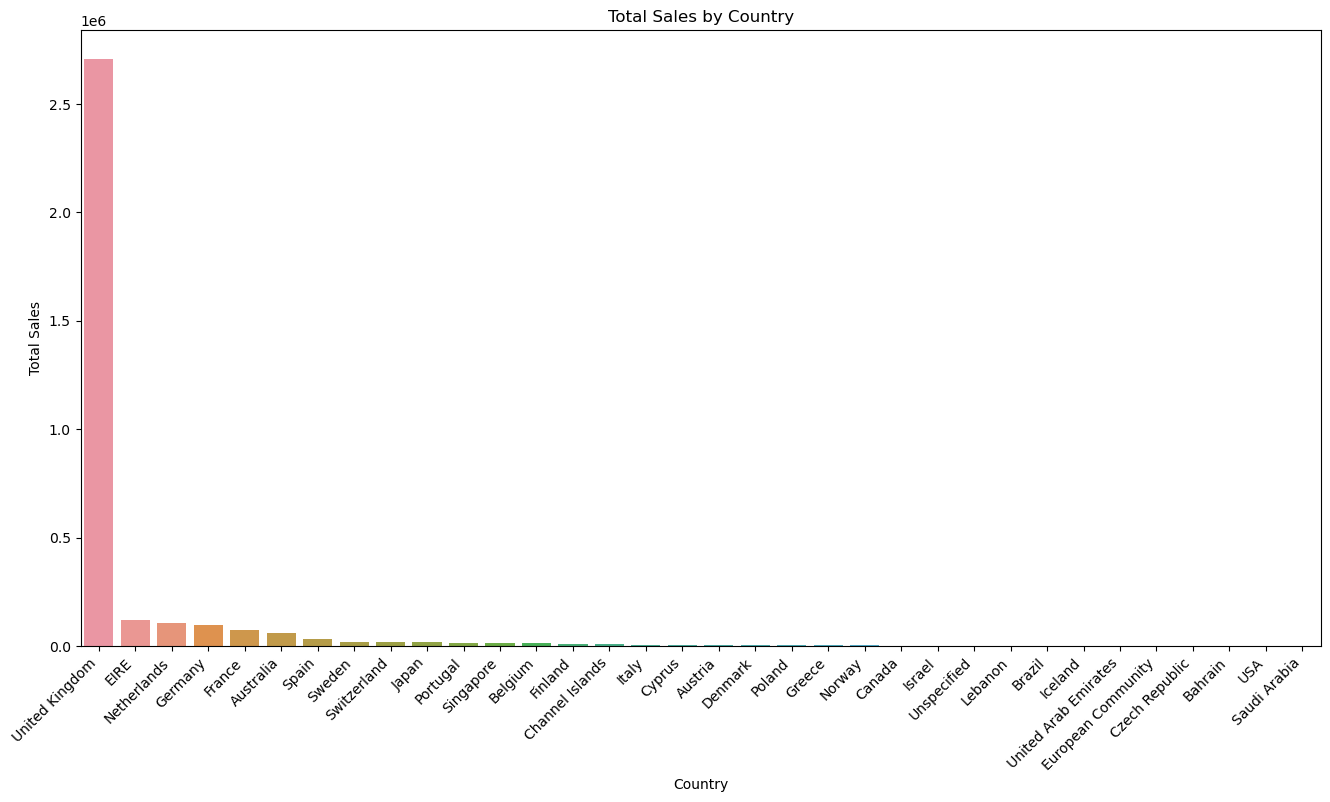

In [94]:
# set figure size
plt.figure(figsize=(16,8))

# create bar plot
sns.barplot(x="Country", y="Sales Amount", data= total_sales_by_country )

# set plot title and axis labels
plt.title("Total Sales by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")


# rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# display plot
plt.show()


In [95]:
df=df[(df['Quantity']>0) & (df['Unit Price']>0)]
df.to_csv('retail1.csv')

In [96]:
df = pd.read_csv('retail1.csv')

retail_df = df[(df["Country"] == "United Kingdom")] 


## Enriching our Dataset with Customer Demographics Dataset

In [98]:
customer_df = pd.read_csv('customer_data_updated_demographics.csv')

# Join the two datasets on the Customer_ID column
merged_df_retail = pd.merge(retail_df, customer_df, on='Customer_ID', how='inner')

# Write the merged dataset to a new CSV file
merged_df_retail.to_csv('merged_data.csv', index=False)

In [99]:
merged_df_retail.head(5)
merged_df_retail.isnull().sum()




Unnamed: 0      0
Country_x       0
Customer_ID     0
Description     0
Invoice Date    0
Item Code       0
Invoice ID      0
Unit Price      0
Quantity        0
Sales Amount    0
Order_Date      0
Order_Time      0
Month           0
First_Name      0
Last_Name       0
Email           0
Address         0
City            0
Country_y       0
Postal_Code     0
Phone           0
Age             0
Gender          0
dtype: int64

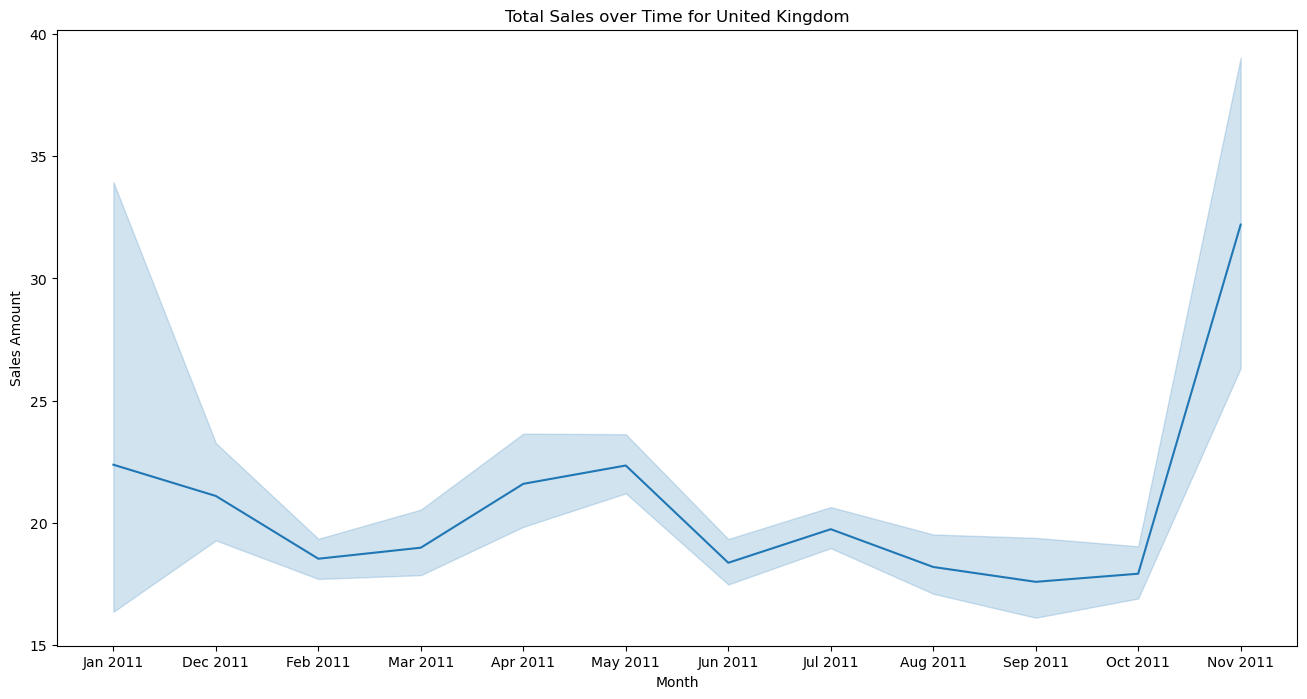

In [100]:
plt.figure(figsize=(16,8))


sns.lineplot(x="Month", y="Sales Amount", data=merged_df_retail)
plt.title("Total Sales over Time for United Kingdom")
plt.show()


In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
#df = pd.read_csv('merged_data.csv')

# Data preprocessing
# Check for missing values
print(merged_df_retail.isnull().sum())

# Check for duplicate rows
print(merged_df_retail.duplicated().sum())

# Descriptive statistics
# Summary statistics for numerical columns
print(merged_df_retail.describe())



Unnamed: 0      0
Country_x       0
Customer_ID     0
Description     0
Invoice Date    0
Item Code       0
Invoice ID      0
Unit Price      0
Quantity        0
Sales Amount    0
Order_Date      0
Order_Time      0
Month           0
First_Name      0
Last_Name       0
Email           0
Address         0
City            0
Country_y       0
Postal_Code     0
Phone           0
Age             0
Gender          0
dtype: int64
0
          Unnamed: 0    Customer_ID     Invoice ID     Unit Price  \
count  106459.000000  106459.000000  106459.000000  106459.000000   
mean    72635.616472   15494.237340  550032.686414       3.093819   
std     42738.042345    1615.617236    6347.898779      26.192784   
min        54.000000   12346.000000  539993.000000       0.001000   
25%     33136.500000   14159.000000  544940.000000       1.250000   
50%     73146.000000   15379.000000  549130.000000       1.950000   
75%    109972.500000   16912.000000  554059.000000       3.750000   
max    144661.00000

In [102]:
merged_df_retail = merged_df_retail.convert_dtypes()

In [103]:
merged_df_retail.info()
merged_df_retail.reset_index(drop=True, inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106459 entries, 0 to 106458
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    106459 non-null  Int64  
 1   Country_x     106459 non-null  string 
 2   Customer_ID   106459 non-null  Int64  
 3   Description   106459 non-null  string 
 4   Invoice Date  106459 non-null  string 
 5   Item Code     106459 non-null  string 
 6   Invoice ID    106459 non-null  Int64  
 7   Unit Price    106459 non-null  Float64
 8   Quantity      106459 non-null  Int64  
 9   Sales Amount  106459 non-null  Float64
 10  Order_Date    106459 non-null  string 
 11  Order_Time    106459 non-null  string 
 12  Month         106459 non-null  string 
 13  First_Name    106459 non-null  string 
 14  Last_Name     106459 non-null  string 
 15  Email         106459 non-null  string 
 16  Address       106459 non-null  string 
 17  City          106459 non-null  string 
 18  Coun

## Removing Rows that are not required for our analysis

In [104]:
merged_df_retail.drop(['Unnamed: 0'], axis = 1, inplace = True)
merged_df_retail.drop(['Country_y'], axis = 1, inplace = True)

## Rename Columns Country_x with Country and Concatenating First_Name and Last_name into one column

In [105]:
merged_df_retail = merged_df_retail.rename(columns={'Country_x': 'Country'})
merged_df_retail['Customer_Name'] = merged_df_retail['First_Name'] + ' ' + merged_df_retail['Last_Name']
merged_df_retail = merged_df_retail.drop(['First_Name', 'Last_Name'], axis=1)
merged_df_retail

,Country,Customer_ID,Description,Invoice Date,Item Code,Invoice ID,Unit Price,Quantity,Sales Amount,Order_Date,Order_Time,Month,Email,Address,City,Postal_Code,Phone,Age,Gender,Customer_Name
0,United Kingdom,15240,RED SPOT CERAMIC DRAWER KNOB,2011-01-02,21671,542776,1.25,48,60.0,2011-01-02,00:00:00,Jan 2011,armstrongclive@example.com,Studio 59 Davis crossroad,South Dawn,G5 0QS,+44(0)1632960796,44,Female,Stuart James
1,United Kingdom,15240,RED STRIPE CERAMIC DRAWER KNOB,2011-01-02,21668,542776,1.25,12,15.0,2011-01-02,00:00:00,Jan 2011,armstrongclive@example.com,Studio 59 Davis crossroad,South Dawn,G5 0QS,+44(0)1632960796,44,Female,Stuart James
2,United Kingdom,15240,RETROSPOT HEART HOT WATER BOTTLE,2011-01-02,21485,542776,4.95,3,14.85,2011-01-02,00:00:00,Jan 2011,armstrongclive@example.com,Studio 59 Davis crossroad,South Dawn,G5 0QS,+44(0)1632960796,44,Female,Stuart James
3,United Kingdom,15240,RED SPOTTY BISCUIT TIN,2011-01-02,21218,542776,3.75,6,22.5,2011-01-02,00:00:00,Jan 2011,armstrongclive@example.com,Studio 59 Davis crossroad,South Dawn,G5 0QS,+44(0)1632960796,44,Female,Stuart James
4,United Kingdom,15240,NAMASTE SWAGAT INCENSE,2011-01-02,17021,542776,0.3,36,10.8,2011-01-02,00:00:00,Jan 2011,armstrongclive@example.com,Studio 59 Davis crossroad,South Dawn,G5 0QS,+44(0)1632960796,44,Female,Stuart James
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106454,United Kingdom,18122,LARGE WHITE HEART OF WICKER,2011-12-07,23322,559774,2.95,2,5.9,2011-12-07,00:00:00,Dec 2011,lucy75@example.org,1 Matthews motorway,Macdonaldfurt,S7D 6UB,0115 4960073,35,Male,Anne Johnson
106455,United Kingdom,18122,NATURAL SLATE HEART CHALKBOARD,2011-12-07,22457,559774,2.95,1,2.95,2011-12-07,00:00:00,Dec 2011,lucy75@example.org,1 Matthews motorway,Macdonaldfurt,S7D 6UB,0115 4960073,35,Male,Anne Johnson
106456,United Kingdom,18122,BAKING SET 9 PIECE RETROSPOT,2011-12-07,22138,559774,4.95,1,4.95,2011-12-07,00:00:00,Dec 2011,lucy75@example.org,1 Matthews motorway,Macdonaldfurt,S7D 6UB,0115 4960073,35,Male,Anne Johnson
106457,United Kingdom,18122,BAKING SET SPACEBOY DESIGN,2011-12-07,22617,559774,4.95,1,4.95,2011-12-07,00:00:00,Dec 2011,lucy75@example.org,1 Matthews motorway,Macdonaldfurt,S7D 6UB,0115 4960073,35,Male,Anne Johnson


In [107]:

merged_df_retail = merged_df_retail[['Country', 'Customer_ID', 'Customer_Name', 'Description', 'Invoice Date', 'Item Code', 'Invoice ID', 'Unit Price', 'Quantity', 'Sales Amount', 'Order_Date', 'Order_Time', 'Month', 'Email', 'Address', 'City', 'Postal_Code', 'Phone', 'Age', 'Gender']]
merged_df_retail.to_csv('merged_data_retail.csv', index = False)

In [108]:
merged_df_retail.isna().sum()


Country          0
Customer_ID      0
Customer_Name    0
Description      0
Invoice Date     0
Item Code        0
Invoice ID       0
Unit Price       0
Quantity         0
Sales Amount     0
Order_Date       0
Order_Time       0
Month            0
Email            0
Address          0
City             0
Postal_Code      0
Phone            0
Age              0
Gender           0
dtype: int64

In [110]:
age_gender_group = merged_df_retail.groupby(['Age', 'Gender'])['Customer_ID'].nunique()
age_gender_group = age_gender_group.reset_index(name='count')
age_gender_group

,Age,Gender,count
0,20,Female,6
1,20,Male,6
2,21,Female,15
3,21,Male,12
4,22,Female,23
...,...,...,...
119,79,Male,20
120,80,Female,14
121,80,Male,15
122,81,Female,10


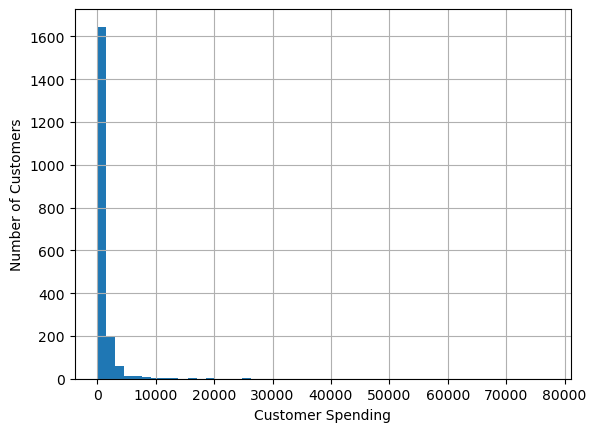

In [112]:
customer_spending = merged_df_retail.groupby(['Customer_ID'])['Sales Amount'].sum()
customer_spending.hist(bins=50)

plt.xlabel('Customer Spending')
plt.ylabel('Number of Customers')
plt.show()

## Analyze customer behavior: Calculate the average sales amount and frequency of orders for each customer(Scatterplot)

Text(0, 0.5, 'Number of Orders')

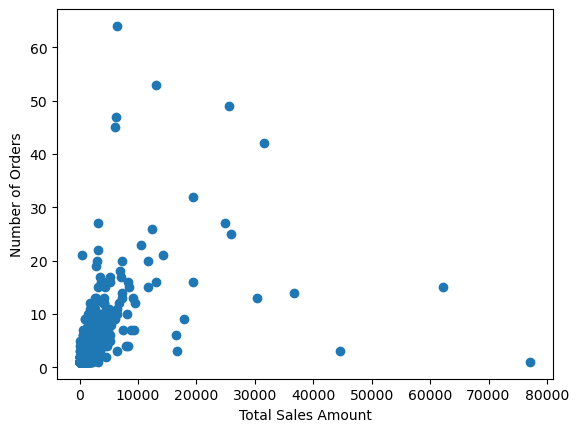

In [113]:
customer_sales = merged_df_retail.groupby(['Customer_ID'])['Sales Amount'].sum()
customer_orders = merged_df_retail.groupby(['Customer_ID'])['Invoice ID'].nunique()

plt.scatter(customer_sales, customer_orders)
plt.xlabel('Total Sales Amount')
plt.ylabel('Number of Orders')


## Visualize customer segmentation: Use a heatmap to visualize the distribution of customers based on age and gender.

<AxesSubplot:xlabel='Gender', ylabel='Age'>

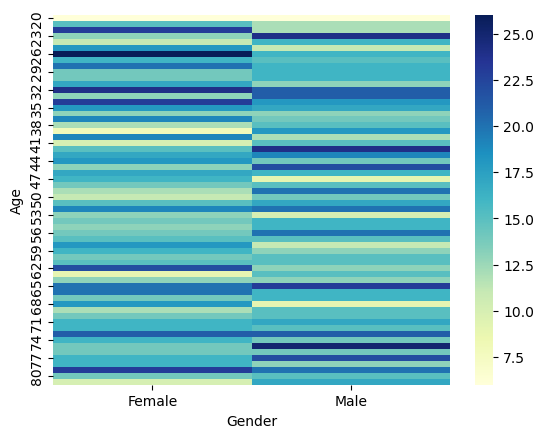

In [114]:
age_gender_pivot = age_gender_group.pivot(index='Age', columns='Gender', values='count')
sns.heatmap(age_gender_pivot, cmap='YlGnBu')


In [115]:
import pandas as pd
from pandas_profiling import ProfileReport

file = pd.read_csv("merged_data.csv")
profile = ProfileReport(file, title = "profile")
profile.to_file("Profile_report_retail_proj_merged.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [116]:
pip install holidays

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.2/514.2 kB 4.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [117]:
# merged_df_retail.describe(include='object')


In [118]:
df.describe(include='all')

,Unnamed: 0,Country,Customer_ID,Description,Invoice Date,Item Code,Invoice ID,Unit Price,Quantity,Sales Amount,Order_Date,Order_Time,Month
count,144650.000000,144650,144650.000000,144650,144650,144650,144650.000000,144650.000000,144650.000000,144650.000000,144650,144650,144650
unique,NaN,34,NaN,3240,147,3168,NaN,NaN,NaN,NaN,147,1,12
top,NaN,United Kingdom,NaN,WHITE HANGING HEART T-LIGHT HOLDER,2011-12-05,85123A,NaN,NaN,NaN,NaN,2011-12-05,00:00:00,Jul 2011
freq,NaN,128138,NaN,956,1740,956,NaN,NaN,NaN,NaN,1740,144650,23247
mean,72332.247639,NaN,15239.330584,NaN,NaN,NaN,549887.127729,3.264555,13.775817,23.179816,NaN,NaN,NaN
std,41760.484523,NaN,1726.947529,NaN,NaN,NaN,6314.471852,25.985722,200.659433,216.530423,NaN,NaN,NaN
min,0.000000,NaN,12346.000000,NaN,NaN,NaN,539993.000000,0.001000,1.000000,0.001000,NaN,NaN,NaN
25%,36167.250000,NaN,13767.000000,NaN,NaN,NaN,544692.000000,1.250000,2.000000,5.040000,NaN,NaN,NaN
50%,72330.500000,NaN,15059.000000,NaN,NaN,NaN,549185.000000,1.950000,6.000000,13.050000,NaN,NaN,NaN
75%,108498.750000,NaN,16770.000000,NaN,NaN,NaN,553867.000000,3.750000,12.000000,19.800000,NaN,NaN,NaN


In [119]:
merged_df_retail['Invoice Date']= pd.to_datetime(merged_df_retail['Invoice Date'])
merged_df_retail['Order_Date'] = [d.date() for d in merged_df_retail['Invoice Date']]
merged_df_retail['Order_Time'] = [d.time() for d in merged_df_retail['Invoice Date']]
merged_df_retail.head()
merged_df_retail['Order_Date']= pd.to_datetime(merged_df_retail['Order_Date'])

In [120]:
#Data preparation steps
print('Min Invoice Date:',merged_df_retail.Order_Date.dt.date.min(),'max Invoice Date:',
      merged_df_retail.Order_Date.dt.date.max())
# merged_df_retail.head(3)
snapshot_date = merged_df_retail['Order_Date'].max() + dt.timedelta(days=1)

snapshot_date


Min Invoice Date: 2011-01-02 max Invoice Date: 2011-12-07


Timestamp('2011-12-08 00:00:00')

In [122]:
rfm = merged_df_retail.groupby(['Customer_ID']).agg({'Order_Date': lambda x : (snapshot_date - x.max()).days,

'Invoice ID':'count','Sales Amount': 'sum'})


In [123]:
rfm.rename(columns={'Order_Date':'Recency','Invoice ID':'Frequency',
'Sales Amount':'MonetaryValue'},inplace= True)


In [124]:
rfm.head(5)

,Recency,Frequency,MonetaryValue
Customer_ID,,,
12346,324,1,77183.6
12747,197,40,1385.13
12748,3,885,6334.27
12749,64,43,859.1
12820,325,11,170.46


In [125]:
r_labels =range(4,0,-1)

f_labels=range(1,5)

m_labels=range(1,5)

r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)

f_quartiles = pd.qcut(rfm['Frequency'],q=4, labels = f_labels)

m_quartiles = pd.qcut(rfm['MonetaryValue'],q=4,labels = m_labels)

rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

# Build RFM Segment and RFM Score

def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])

rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )

rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head()



,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
Customer_ID,,,,,,,,
12346,324,1,77183.6,1,1,4,114,6
12747,197,40,1385.13,2,3,4,234,9
12748,3,885,6334.27,4,4,4,444,12
12749,64,43,859.1,4,3,3,433,10
12820,325,11,170.46,1,1,1,111,3


In [126]:
rfm.groupby(['RFM_Segment']).size().sort_values(ascending=False)[:5]


RFM_Segment
444    164
111    141
344    117
122     91
211     83
dtype: int64

In [127]:
rfm.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean',

'MonetaryValue': ['mean', 'count'] }).round(1)
# Use RFM score to group customers into gold, silver and bronze segments:

def segments(df):
    if df['RFM_Score'] > 9:
        return 'Gold'

    elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9 ):
        return 'Silver'

    else:
        return 'Bronze'

rfm['General_Segment'] = rfm.apply(segments,axis=1)

rfm.groupby('General_Segment').agg({'Recency':'mean','Frequency':'mean',

'MonetaryValue':['mean','count']}).round(1)


Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            245.9      11.8         202.6   555
Gold               88.8     131.4        2684.3   538
Silver            161.3      33.9         750.9   862

In [129]:
# Merged rfm and main dataframe

mdf = pd.merge(merged_df_retail,rfm,on='Customer_ID')

#mdf = mdf.drop(['Unnamed: 0'], axis = 1)
# Created 3 data frames based on RFM segments to perform MBA.

Bronze_seg = mdf[mdf.General_Segment == 'Bronze']

Bronze_seg

Silver_seg = mdf[mdf.General_Segment == 'Silver']

Silver_seg

Gold_seg = mdf[mdf.General_Segment == 'Gold']

Gold_seg

,Country,Customer_ID,Customer_Name,Description,Invoice Date,Item Code,Invoice ID,Unit Price,Quantity,Sales Amount,...,Gender,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
22,United Kingdom,14606,Christine Gibson,FRENCH ENAMEL POT W LID,2011-01-02,85054,542800,2.95,1,2.95,...,Male,3,1313,6313.88,4,4,4,444,12,Gold
23,United Kingdom,14606,Christine Gibson,HEART DECORATION WITH PEARLS,2011-01-02,22156,542800,0.72,1,0.72,...,Male,3,1313,6313.88,4,4,4,444,12,Gold
24,United Kingdom,14606,Christine Gibson,FRYING PAN RED RETROSPOT,2011-01-02,22199,542862,4.25,1,4.25,...,Male,3,1313,6313.88,4,4,4,444,12,Gold
25,United Kingdom,14606,Christine Gibson,SET/6 PINK BUTTERFLY T-LIGHTS,2011-01-02,72351B,542862,2.1,1,2.1,...,Male,3,1313,6313.88,4,4,4,444,12,Gold
26,United Kingdom,14606,Christine Gibson,SET OF 3 HEART COOKIE CUTTERS,2011-01-02,84378,542862,1.25,1,1.25,...,Male,3,1313,6313.88,4,4,4,444,12,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106269,United Kingdom,17970,Michelle Green,DECORATIVE PLANT POT WITH FRIEZE,2011-12-05,22825,553034,7.95,2,15.9,...,Male,3,29,562.79,4,3,3,433,10,Gold
106270,United Kingdom,17970,Michelle Green,HIPPY CHIC DECORATIVE PARASOL,2011-12-05,21631,553034,12.75,2,25.5,...,Male,3,29,562.79,4,3,3,433,10,Gold
106271,United Kingdom,17970,Michelle Green,BLUE DRAGONFLY HELICOPTER,2011-12-05,85135B,553034,7.95,1,7.95,...,Male,3,29,562.79,4,3,3,433,10,Gold
106272,United Kingdom,17970,Michelle Green,RETROSPOT LAMP,2011-12-05,22180,553034,9.95,1,9.95,...,Male,3,29,562.79,4,3,3,433,10,Gold


In [130]:
Silver_seg

,Country,Customer_ID,Customer_Name,Description,Invoice Date,Item Code,Invoice ID,Unit Price,Quantity,Sales Amount,...,Gender,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
0,United Kingdom,15240,Stuart James,RED SPOT CERAMIC DRAWER KNOB,2011-01-02,21671,542776,1.25,48,60.0,...,Female,4,22,629.1,4,2,3,423,9,Silver
1,United Kingdom,15240,Stuart James,RED STRIPE CERAMIC DRAWER KNOB,2011-01-02,21668,542776,1.25,12,15.0,...,Female,4,22,629.1,4,2,3,423,9,Silver
2,United Kingdom,15240,Stuart James,RETROSPOT HEART HOT WATER BOTTLE,2011-01-02,21485,542776,4.95,3,14.85,...,Female,4,22,629.1,4,2,3,423,9,Silver
3,United Kingdom,15240,Stuart James,RED SPOTTY BISCUIT TIN,2011-01-02,21218,542776,3.75,6,22.5,...,Female,4,22,629.1,4,2,3,423,9,Silver
4,United Kingdom,15240,Stuart James,NAMASTE SWAGAT INCENSE,2011-01-02,17021,542776,0.3,36,10.8,...,Female,4,22,629.1,4,2,3,423,9,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106454,United Kingdom,18122,Anne Johnson,LARGE WHITE HEART OF WICKER,2011-12-07,23322,559774,2.95,2,5.9,...,Male,1,23,119.19,4,2,1,421,7,Silver
106455,United Kingdom,18122,Anne Johnson,NATURAL SLATE HEART CHALKBOARD,2011-12-07,22457,559774,2.95,1,2.95,...,Male,1,23,119.19,4,2,1,421,7,Silver
106456,United Kingdom,18122,Anne Johnson,BAKING SET 9 PIECE RETROSPOT,2011-12-07,22138,559774,4.95,1,4.95,...,Male,1,23,119.19,4,2,1,421,7,Silver
106457,United Kingdom,18122,Anne Johnson,BAKING SET SPACEBOY DESIGN,2011-12-07,22617,559774,4.95,1,4.95,...,Male,1,23,119.19,4,2,1,421,7,Silver


In [131]:
Bronze_seg

,Country,Customer_ID,Customer_Name,Description,Invoice Date,Item Code,Invoice ID,Unit Price,Quantity,Sales Amount,...,Gender,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
5468,United Kingdom,15456,Arthur Newman,REX CASH+CARRY JUMBO SHOPPER,2011-01-03,21034,545312,0.95,3,2.85,...,Male,339,33,203.37,1,3,1,131,5,Bronze
5469,United Kingdom,15456,Arthur Newman,MINI CAKE STAND WITH HANGING CAKES,2011-01-03,37446,545312,1.45,3,4.35,...,Male,339,33,203.37,1,3,1,131,5,Bronze
5470,United Kingdom,15456,Arthur Newman,MINI CAKE STAND HANGING STRAWBERY,2011-01-03,22055,545312,1.65,3,4.95,...,Male,339,33,203.37,1,3,1,131,5,Bronze
5471,United Kingdom,15456,Arthur Newman,VICTORIAN GLASS HANGING T-LIGHT,2011-01-03,22178,545312,1.25,6,7.5,...,Male,339,33,203.37,1,3,1,131,5,Bronze
5472,United Kingdom,15456,Arthur Newman,"BIRTHDAY CARD, RETRO SPOT",2011-01-03,22819,545312,0.42,12,5.04,...,Male,339,33,203.37,1,3,1,131,5,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103473,United Kingdom,13565,Sharon Smith,GARDEN PATH JOURNAL,2011-09-01,20772,540537,2.55,1,2.55,...,Female,98,13,110.18,3,1,1,311,5,Bronze
103474,United Kingdom,13565,Sharon Smith,JAM MAKING SET WITH JARS,2011-09-01,22960,540537,4.25,2,8.5,...,Female,98,13,110.18,3,1,1,311,5,Bronze
103475,United Kingdom,13565,Sharon Smith,PAINTED METAL PEARS ASSORTED,2011-09-01,21136,540537,1.69,12,20.28,...,Female,98,13,110.18,3,1,1,311,5,Bronze
103476,United Kingdom,13565,Sharon Smith,LOVEBIRD HANGING DECORATION WHITE,2011-09-01,22219,540537,0.85,2,1.7,...,Female,98,13,110.18,3,1,1,311,5,Bronze


In [132]:
rfm_rfm = rfm[['Recency','Frequency','MonetaryValue']]
print(rfm_rfm.describe())


           Recency    Frequency  MonetaryValue
count  1955.000000  1955.000000    1955.000000
mean    165.378005    54.454731    1127.302988
std      91.767456   103.260824    3295.216266
min       1.000000     1.000000       2.900000
25%      97.500000    13.000000     225.115000
50%     157.000000    28.000000     458.470000
75%     237.000000    61.000000    1057.600000
max     339.000000  2597.000000   77183.600000


/Users/jonathangabriel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jonathangabriel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jonathangabriel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

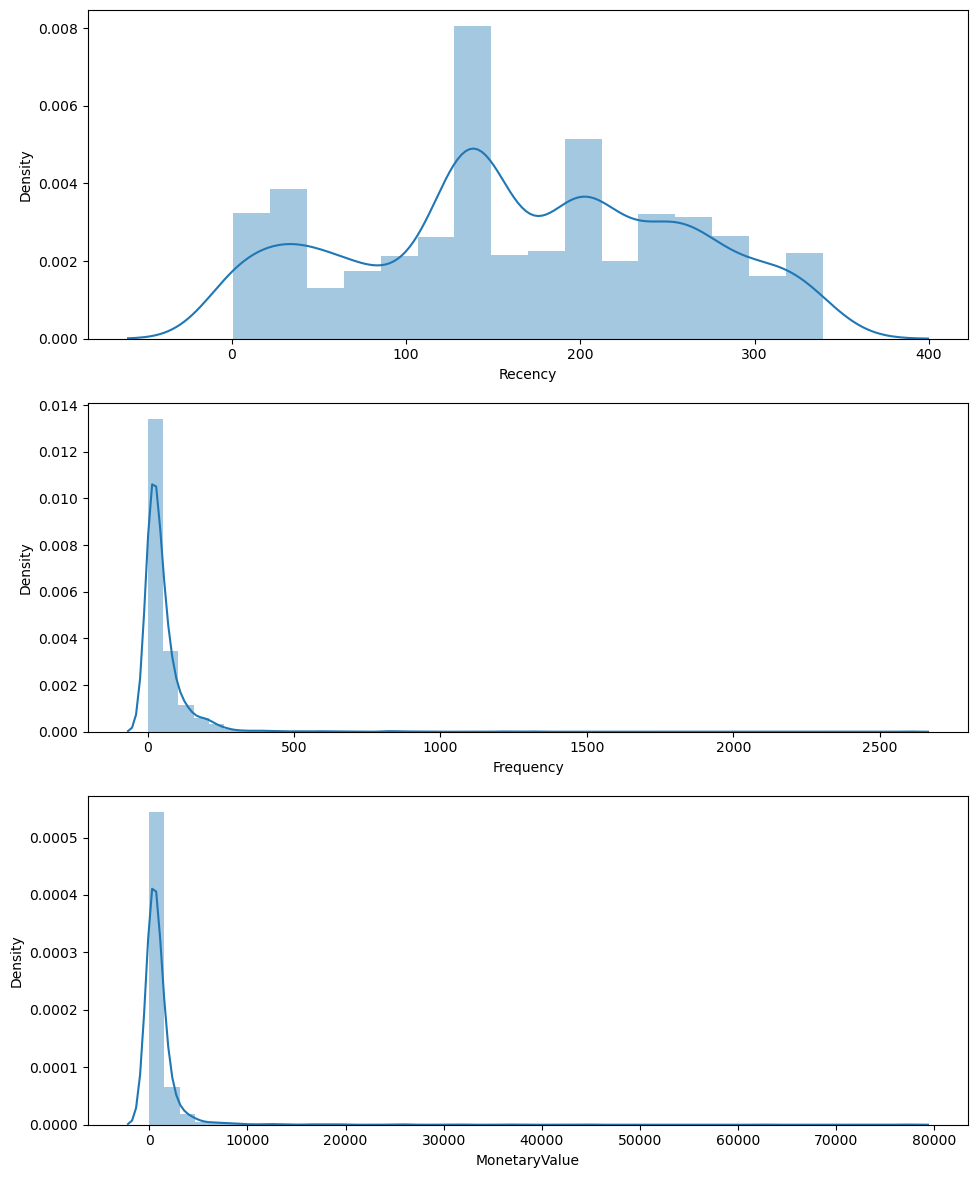

In [133]:
f,ax = plt.subplots(figsize=(10, 12))

plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')

plt.subplot(3, 1, 2); sns.distplot(rfm.Frequency, label = 'Frequency')

plt.subplot(3, 1, 3); sns.distplot(rfm.MonetaryValue, label = 'Monetary Value')

plt.style.use('fivethirtyeight')

plt.tight_layout()

plt.show()


## Data Pre-Processing for K-means Clustering


In [134]:
rfm_rfm = rfm[['Recency','Frequency','MonetaryValue']]
print(rfm_rfm.describe())

           Recency    Frequency  MonetaryValue
count  1955.000000  1955.000000    1955.000000
mean    165.378005    54.454731    1127.302988
std      91.767456   103.260824    3295.216266
min       1.000000     1.000000       2.900000
25%      97.500000    13.000000     225.115000
50%     157.000000    28.000000     458.470000
75%     237.000000    61.000000    1057.600000
max     339.000000  2597.000000   77183.600000


/Users/jonathangabriel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jonathangabriel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jonathangabriel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

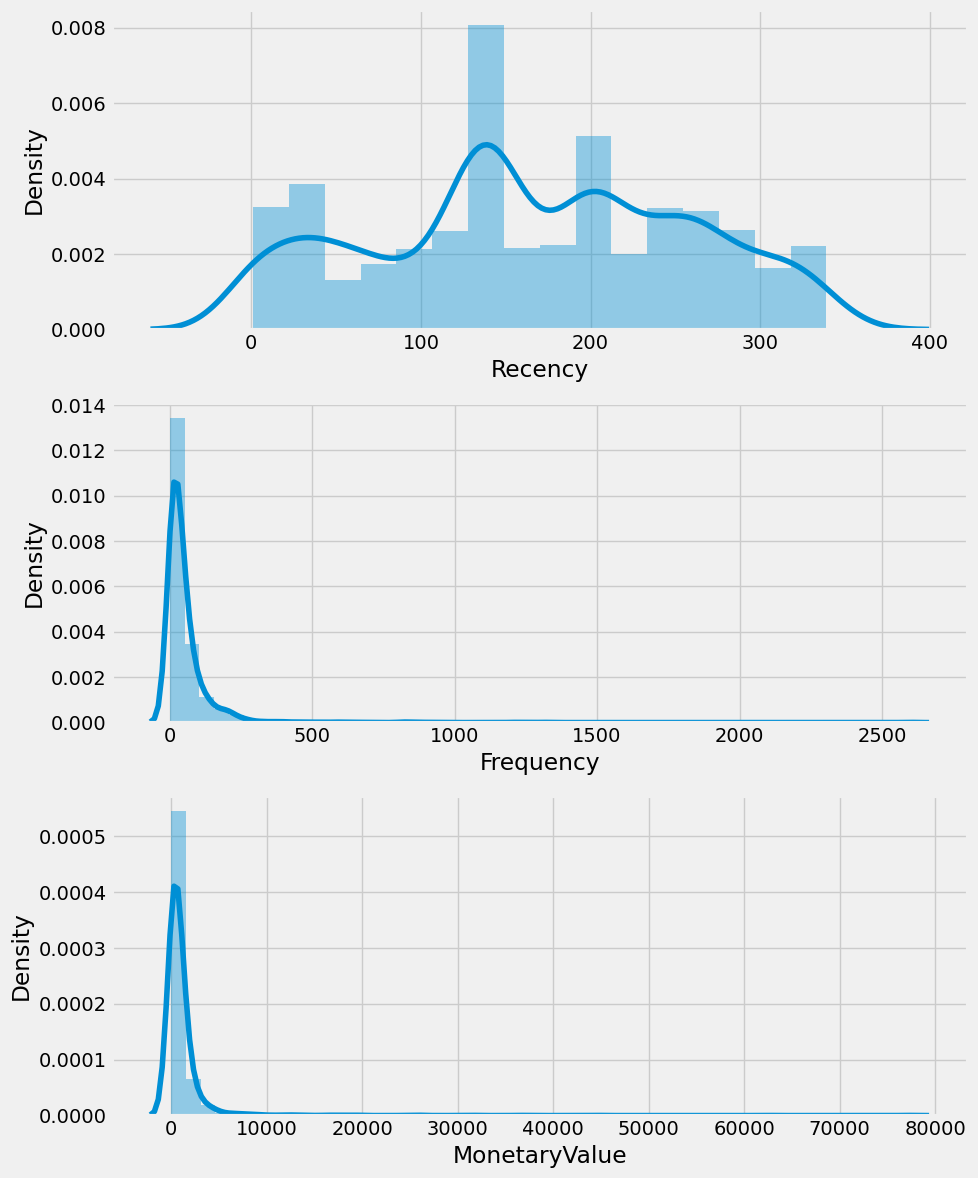

In [135]:
f,ax = plt.subplots(figsize=(10, 12))

plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')

plt.subplot(3, 1, 2); sns.distplot(rfm.Frequency, label = 'Frequency')

plt.subplot(3, 1, 3); sns.distplot(rfm.MonetaryValue, label = 'Monetary Value')

plt.style.use('fivethirtyeight')

plt.tight_layout()

plt.show()

## There is a problem here with Skewness of the data which is unsymmetrical(Data Skewed)

## Unskew the data with log transformation

In [136]:
rfm_log = rfm[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log, axis = 1).round(3)

## plot the distribution of RFM values

/Users/jonathangabriel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jonathangabriel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jonathangabriel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

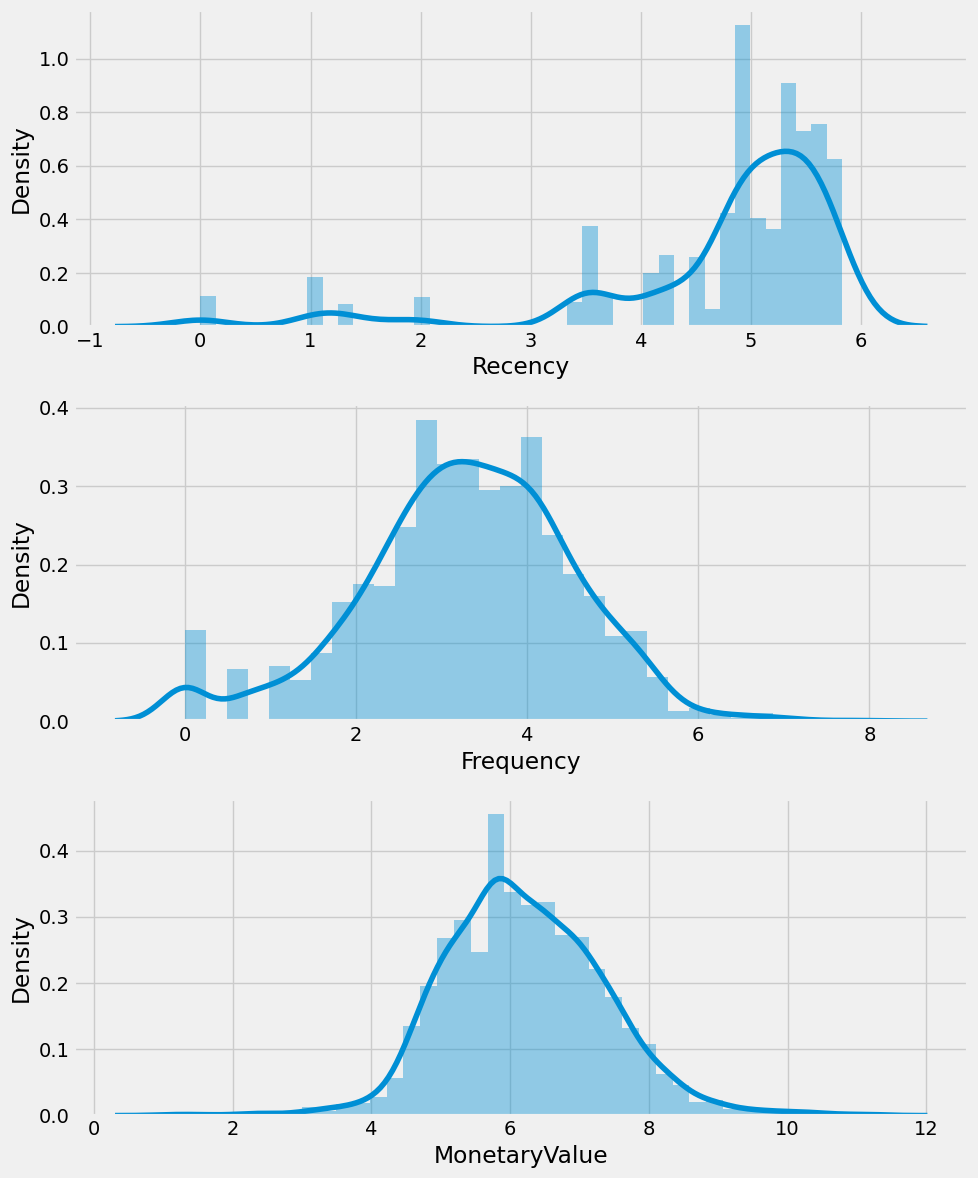

In [137]:
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm_log.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_log.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_log.MonetaryValue, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()


## Implementation of K-Means Clustering
## Normalize the variables with StandardScaler

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
#Normalizing the rfm_log data
rfm_normalized= scaler.transform(rfm_log)

Silhouette score for 2 clusters: 0.3765348223296697
Silhouette score for 3 clusters: 0.39736747853934706
Silhouette score for 4 clusters: 0.3304446596575849
Silhouette score for 5 clusters: 0.2833330410998587
Silhouette score for 6 clusters: 0.28495836203713265
Silhouette score for 7 clusters: 0.3119053504631749
Silhouette score for 8 clusters: 0.2744198634676409
Silhouette score for 9 clusters: 0.2839431206552134
Silhouette score for 10 clusters: 0.26439115715801265
Silhouette score for 11 clusters: 0.27717765141455636
Silhouette score for 12 clusters: 0.2854125050319975
Silhouette score for 13 clusters: 0.29560981387931706
Silhouette score for 14 clusters: 0.2904100599827949
WCV for 2 clusters: 3546.806496024706
WCV for 3 clusters: 2430.7864051024717
WCV for 4 clusters: 1905.4374762468126
WCV for 5 clusters: 1679.5024343356763
WCV for 6 clusters: 1489.9539969864281
WCV for 7 clusters: 1326.9422608326859
WCV for 8 clusters: 1211.4388458458707
WCV for 9 clusters: 1111.94452534707
WCV f

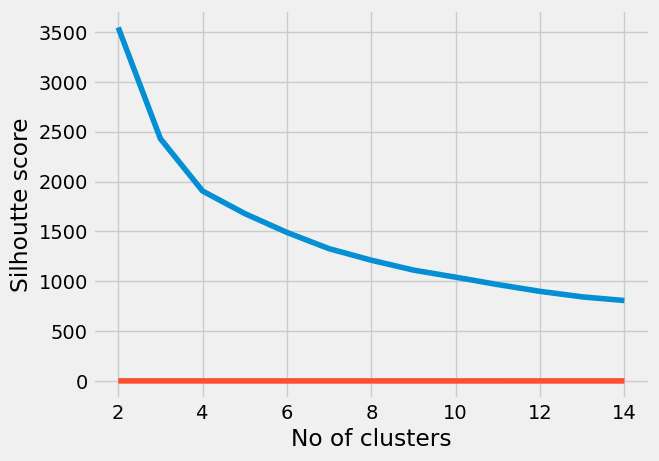

In [139]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#First : Get the Best KMeans 

wcv=[]
silk_score=[]
for i in range(2, 15):
    km=KMeans(n_clusters=i, random_state=0)##intialize
    km.fit(rfm_normalized)##train: finding clusters 

    wcv.append(km.inertia_) ##to calculate within cluster variation
    silk_score.append(silhouette_score(rfm_normalized, km.labels_))
    
    
##plotting the wcv
plt.plot(range(2,15), wcv)
plt.xlabel('No of clusters')
plt.ylabel('Within cluster variation')

#plotting silk score
plt.plot(range(2,15), silk_score)
plt.xlabel('No of clusters')
plt.ylabel('Silhoutte score')



for i in range(2, 15):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(rfm_normalized)
    score = silhouette_score(rfm_normalized, km.labels_)
    print(f"Silhouette score for {i} clusters: {score}")
    
for i in range(2, 15):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(rfm_normalized)
    wcv = km.inertia_
    print(f"WCV for {i} clusters: {wcv}")




## As we can see Silhoutte Score is maximum at 3 and then goes down so let's go with 3 clusters

In [140]:
km = KMeans(n_clusters= 3, random_state=1)

km.fit(rfm_normalized)

#Create a cluster label column in the original DataFrame

cluster_labels = km.labels_

#Calculate average RFM values and size for each cluster:

rfm_rfm_k3 = rfm_rfm.assign(K_Cluster = cluster_labels)

#Calculate average RFM values and sizes for each cluster:

rfm_rfm_k3.groupby('K_Cluster').agg({'Recency': 'mean','Frequency': 'mean',

                                         'MonetaryValue': ['mean', 'count'],}).round(0)


Recency Frequency MonetaryValue      
             mean      mean          mean count
K_Cluster                                      
0           205.0      16.0         271.0   970
1             4.0     145.0        3482.0   133
2           145.0      85.0        1735.0   852

## From the 0th Cluster we can see that there was a high mean recency(i.e gap between Successive Transactions), low mean frequency and low mean monetary value(i.e Bronze Customers)
## From the 1st Cluster we can see that there was a low mean recency(i.e gap between Successive Transactions), high frequency of transactions with highest monetary value (i.e Gold Customers)
## From the 2nd Cluster we can see that there was a moderate mean recency(i.e gap between Successive Transactions), moderate frequency with moderate monetary value(i.e Silver Customers)

## Snake Plots to Understand and Compare Segments

In [144]:
# fill missing values with the median
rfm_rfm = rfm_rfm.fillna(rfm_rfm.median())

# normalize the data
rfm_normalized = (rfm_rfm - rfm_rfm.mean()) / rfm_rfm.std()

rfm_normalized = pd.DataFrame(rfm_normalized,index=rfm_rfm.index,columns=rfm_rfm.columns)

rfm_normalized['K_Cluster'] = km.labels_

rfm_normalized['General_Segment'] = rfm['General_Segment']

rfm_normalized.reset_index(inplace = True)

#Melt the data into a long format so RFM values and metric names are stored in 1 column each

rfm_melt = pd.melt(rfm_normalized,id_vars=['Customer_ID','General_Segment','K_Cluster'],

                            value_vars=['Recency', 'Frequency', 'MonetaryValue'],var_name='Metric',value_name='Value')


rfm_melt


,Customer_ID,General_Segment,K_Cluster,Metric,Value
0,12346,Silver,2,Recency,1.728521
1,12747,Silver,2,Recency,0.344588
2,12748,Gold,1,Recency,-1.769451
3,12749,Gold,2,Recency,-1.104727
4,12820,Bronze,0,Recency,1.739418
...,...,...,...,...,...
5860,18272,Gold,1,MonetaryValue,0.184175
5861,18273,Bronze,0,MonetaryValue,-0.326626
5862,18280,Bronze,0,MonetaryValue,-0.287296
5863,18283,Gold,2,MonetaryValue,-0.143205


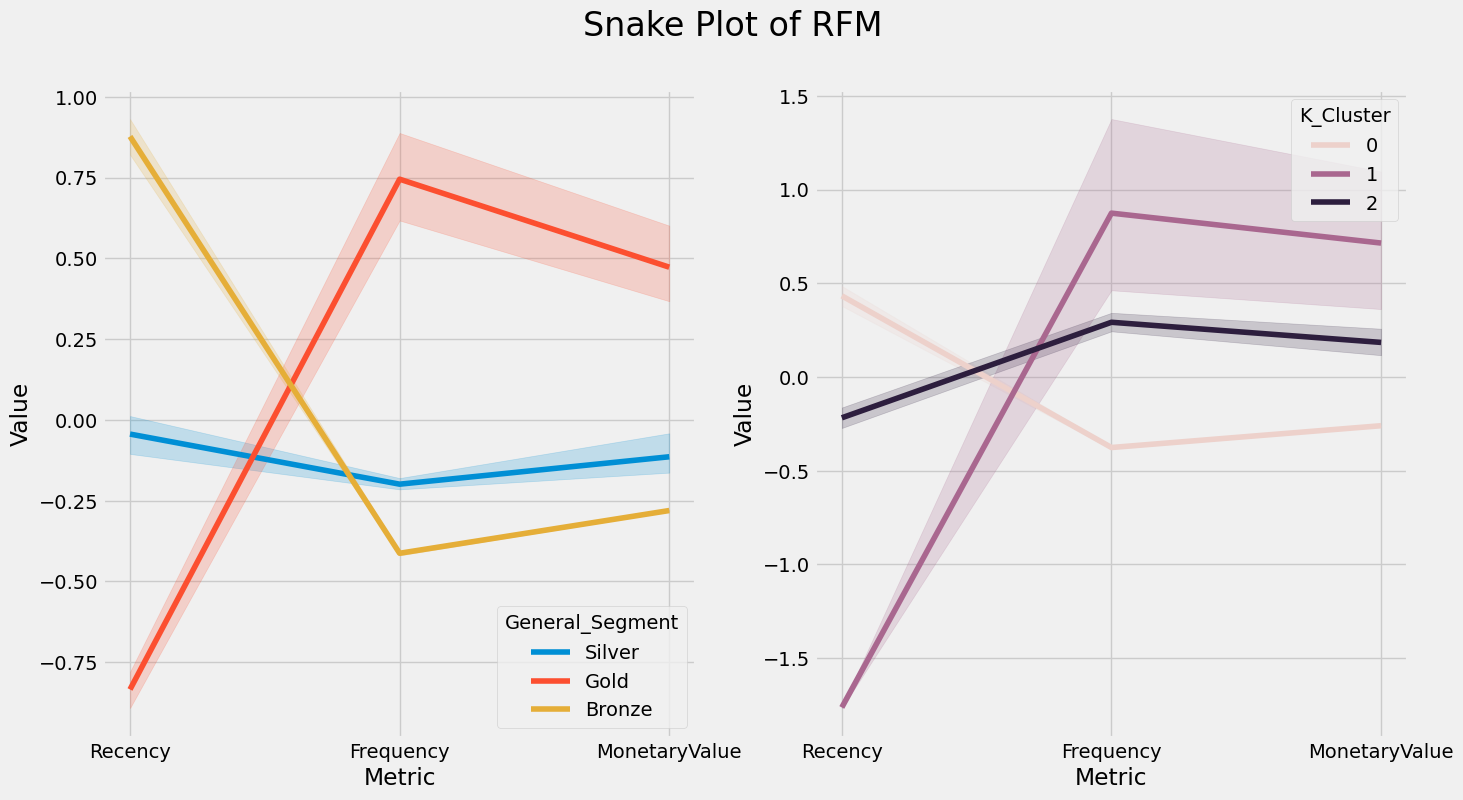

In [145]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 8))

sns.lineplot(x = 'Metric', y = 'Value', hue = 'General_Segment', data = rfm_melt,ax=ax1)

# a snake plot with K-Means

sns.lineplot(x = 'Metric', y = 'Value', hue = 'K_Cluster', data = rfm_melt,ax=ax2)

plt.suptitle("Snake Plot of RFM",fontsize=24) #make title fontsize subtitle 

plt.show()


## We can also Intrepret the Same thing with their values using Snake plot as this Accurately represents the General segments and the K_clusters as K_cluster 0 is bronze and K_cluster 1 is Gold and K_cluster 2 is Silver from this plot.



In [146]:
## MBA

## Market Basket Analysis
## Apriori Algorithm
# Apriori algorithm works on the principle of how two or more products/objects are associated with each other. In orther words, we can say that it is an algorithm that analyzes customers who bought product A also bought product B. Generally it works on datasets containing large number of transactions.

In [147]:
basket_bronze = (Bronze_seg.groupby(['Invoice ID', 'Description'])['Quantity']

          .sum().unstack().reset_index().fillna(0)

          .set_index('Invoice ID'))

basket_bronze.head() 

basket_bronze.copy = basket_bronze 

basket_bronze.copy.head() 


basket_bronze.copy = basket_bronze.copy.astype(int)


basket_bronze.copy.shape
basket_bronze

Description,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCILS SMALL TUBE RED RETROSPOT,...,ZINC FINISH 15CM PLANTER POTS,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
Invoice ID,,,,,,,,,,,,,,,,,,,,,
540016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
561714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
561732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
def encode_units(x):

    if x <= 0:

        return 0

    if x >= 1:

        return 1

basket_bronze_sets = basket_bronze.copy.applymap(encode_units)

#basket_bronze_sets.head()
basket_bronze_sets

Description,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCILS SMALL TUBE RED RETROSPOT,...,ZINC FINISH 15CM PLANTER POTS,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
Invoice ID,,,,,,,,,,,,,,,,,,,,,
540016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
561714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
561732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
from mlxtend.frequent_patterns import apriori

from mlxtend.frequent_patterns import association_rules

%matplotlib inline

# find frequent itemsets
# only itemsets that are sold atleast 4 times a day: 4*7 = 28 so that min_support = 28/6561 = 0.0042

frequent_itemsets_bronze = apriori(basket_bronze_sets, min_support=0.0042, use_colnames=True)

#Build frequent itemsets

frequent_itemsets_bronze['length'] = frequent_itemsets_bronze['itemsets'].apply(lambda x: len(x))

frequent_itemsets_bronze  


rules_bronze = association_rules(frequent_itemsets_bronze, metric="lift", min_threshold=1)

rules_bronze


#Products having 90% confidence likely to be purchased together

rules_bronze[(rules_bronze['lift'] >= 1) & (rules_bronze['confidence'] >= 0.9)]

# rules_bronze.to_csv('MBA.csv')

/Users/jonathangabriel/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(PINK OWL SOFT TOY),(6 RIBBONS RUSTIC CHARM),0.004769,0.020668,0.004769,1.0,48.384615,0.004671,inf
54,"(AIRLINE LOUNGE,METAL SIGN)",(COLOUR GLASS T-LIGHT HOLDER HANGING),0.004769,0.028617,0.004769,1.0,34.944444,0.004633,inf
59,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.007949,0.025437,0.007949,1.0,39.312500,0.007747,inf
79,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.007949,0.025437,0.007949,1.0,39.312500,0.007747,inf
168,(BAKING MOULD ROSE MILK CHOCOLATE),(BAKING MOULD CHOCOLATE CUPCAKES),0.004769,0.007949,0.004769,1.0,125.800000,0.004732,inf
...,...,...,...,...,...,...,...,...,...
3491,(HERB MARKER BASIL),"(HERB MARKER CHIVES, HERB MARKER MINT, HERB MA...",0.004769,0.004769,0.004769,1.0,209.666667,0.004747,inf
3492,(HERB MARKER MINT),"(HERB MARKER CHIVES, HERB MARKER BASIL, HERB M...",0.004769,0.004769,0.004769,1.0,209.666667,0.004747,inf
3493,(HERB MARKER THYME),"(HERB MARKER CHIVES, HERB MARKER BASIL, HERB M...",0.004769,0.004769,0.004769,1.0,209.666667,0.004747,inf
3494,(HERB MARKER PARSLEY),"(HERB MARKER CHIVES, HERB MARKER BASIL, HERB M...",0.004769,0.004769,0.004769,1.0,209.666667,0.004747,inf


## with High Lift scores and 90% Confidence We can actually see here that we have 1013 frequently purchased Items together 

## Similary we can do this for Silver and Gold Customers

In [150]:
basket_silver = (Silver_seg.groupby(['Invoice ID', 'Description'])['Quantity']

          .sum().unstack().reset_index().fillna(0)

          .set_index('Invoice ID'))

basket_silver.head() 

basket_silver.copy = basket_silver

basket_silver.copy.head() 


basket_silver.copy = basket_silver.copy.astype(int)


basket_silver.copy.shape
basket_silver

Description,4 PURPLE FLOCK DINNER CANDLES,DOLLY GIRL BEAKER,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,...,ZINC METAL HEART DECORATION,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice ID,,,,,,,,,,,,,,,,,,,,,
539993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
561869,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
561878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
def encode_units(x):

    if x <= 0:

        return 0

    if x >= 1:

        return 1

basket_silver_sets = basket_silver.copy.applymap(encode_units)

#basket_bronze_sets.head()
basket_silver_sets

Description,4 PURPLE FLOCK DINNER CANDLES,DOLLY GIRL BEAKER,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,...,ZINC METAL HEART DECORATION,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice ID,,,,,,,,,,,,,,,,,,,,,
539993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
561869,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
561878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
basket_gold = (Gold_seg.groupby(['Invoice ID', 'Description'])['Quantity']

          .sum().unstack().reset_index().fillna(0)

          .set_index('Invoice ID'))

basket_gold.head() 

basket_gold.copy = basket_gold

basket_gold.copy.head() 


basket_gold.copy =  basket_gold.copy.astype(int)


basket_gold.copy.shape
basket_gold

Description,4 PURPLE FLOCK DINNER CANDLES,DOLLY GIRL BEAKER,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,...,ZINC METAL HEART DECORATION,ZINC PLANT POT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE SWEETHEART LETTER TRAY
Invoice ID,,,,,,,,,,,,,,,,,,,,,
540002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
561896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
561897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
def encode_units(x):

    if x <= 0:

        return 0

    if x >= 1:

        return 1

basket_gold_sets = basket_gold.copy.applymap(encode_units)

#basket_bronze_sets.head()
basket_gold_sets

Description,4 PURPLE FLOCK DINNER CANDLES,DOLLY GIRL BEAKER,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,...,ZINC METAL HEART DECORATION,ZINC PLANT POT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE SWEETHEART LETTER TRAY
Invoice ID,,,,,,,,,,,,,,,,,,,,,
540002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
561896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
561897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Item Based Collaborative Filtering for Bronze Segment

In [154]:
Bronze_seg["Quantity"] = Bronze_seg["Quantity"].astype(int)
CID_PN_matrix = Bronze_seg.pivot_table(index = ["Invoice ID"], columns = ["Description"], 

                              values = "Quantity").fillna(0)

basket_bronze_set = CID_PN_matrix.applymap(encode_units)

basket_bronze_set_int = basket_bronze_set.astype(int)

coocM_Bronze = basket_bronze_set_int.T.dot(basket_bronze_set)

x_Bronze = pd.DataFrame(coocM_Bronze.idxmax()).reset_index()

x_Bronze.columns = ["A", "B"]

x_Bronze

r_Bronze = x_Bronze[x_Bronze["A"] != x_Bronze["B"]]

r_Bronze.head(10)

matrix_Bronze = Bronze_seg.pivot_table(index = ["Invoice ID"], columns = ["Description"], 

                              values = "Quantity")

matrix_Bronze.head(10)

HerbMaker = matrix_Bronze["COLOUR GLASS T-LIGHT HOLDER HANGING"]

HerbMaker.head()


/var/folders/6_/g9lywzxj5hb6vln3ckbxczlr0000gn/T/ipykernel_27740/2062171781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bronze_seg["Quantity"] = Bronze_seg["Quantity"].astype(int)


Invoice ID
540016   NaN
540173   NaN
540274   NaN
540399   NaN
540411   NaN
Name: COLOUR GLASS T-LIGHT HOLDER HANGING, dtype: float64

In [155]:
similarProductsW_Bronze = matrix_Bronze.corrwith(HerbMaker)

similarProductsW_Bronze = similarProductsW_Bronze.dropna()

df1 = pd.DataFrame(similarProductsW_Bronze)

df1.head(10)

corrMatrix_Bronze = matrix_Bronze.corr()

corrMatrix_Bronze.head()

# Suppose if I want to find 3rd Invoice ID for which Customer Buys
second_customer_Bronze = matrix_Bronze.iloc[2].dropna()

second_customer_Bronze.head()

/Users/jonathangabriel/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/jonathangabriel/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Description
ANTIQUE TALL SWIRLGLASS TRINKET POT    20.0
FLUTED ANTIQUE CANDLE HOLDER           24.0
HOME BUILDING BLOCK WORD                6.0
LOVE BUILDING BLOCK WORD                6.0
T-LIGHT GLASS FLUTED ANTIQUE           36.0
Name: 540274, dtype: float64

In [156]:
simProducts_Bronze = pd.Series()

#Go through every product bought by second customer

for i in range(0, len(second_customer_Bronze.index)):

    print("Adding similar Items for " + second_customer_Bronze.index[i] + "....")

    #Retrieve similar products to the ones bought by customer 2
    ## These may be brought by other customers in combination with one or more products choosen by the 2nd customer

    sims_Bronze = corrMatrix_Bronze[second_customer_Bronze.index[i]].dropna()

    #Scale to how many of the products were bought

    sims_Bronze = sims_Bronze.map(lambda x: x * second_customer_Bronze[i])

    # Add to the list of similar products

    simProducts_Bronze = simProducts_Bronze.append(sims_Bronze)



simProducts_Bronze.sort_values(inplace = True, ascending = True)

print(simProducts_Bronze)

Adding similar Items for ANTIQUE TALL SWIRLGLASS TRINKET POT....
Adding similar Items for FLUTED ANTIQUE CANDLE HOLDER....
Adding similar Items for HOME BUILDING BLOCK WORD....
Adding similar Items for LOVE BUILDING BLOCK WORD....
Adding similar Items for T-LIGHT GLASS FLUTED ANTIQUE....
ANTIQUE TALL SWIRLGLASS TRINKET POT   -36.000000
T-LIGHT GLASS FLUTED ANTIQUE          -20.000000
WHITE HANGING HEART T-LIGHT HOLDER    -20.000000
HEART OF WICKER LARGE                  -6.000000
WHITE WOOD GARDEN PLANT LADDER         -6.000000
JAM MAKING SET WITH JARS               -6.000000
HANGING METAL HEART LANTERN            -6.000000
PACK OF 20 NAPKINS RED APPLES          -3.000000
REX CASH+CARRY JUMBO SHOPPER           -2.000000
WHITE HANGING HEART T-LIGHT HOLDER      0.820890
LOVE BUILDING BLOCK WORD                2.633372
HOME BUILDING BLOCK WORD                2.633372
PACK OF 12 HEARTS DESIGN TISSUES        4.431294
WHITE HANGING HEART T-LIGHT HOLDER      4.432600
NO SINGING METAL SIGN    

/var/folders/6_/g9lywzxj5hb6vln3ckbxczlr0000gn/T/ipykernel_27740/2457714273.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  simProducts_Bronze = pd.Series()
/var/folders/6_/g9lywzxj5hb6vln3ckbxczlr0000gn/T/ipykernel_27740/2457714273.py:20: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simProducts_Bronze = simProducts_Bronze.append(sims_Bronze)
/var/folders/6_/g9lywzxj5hb6vln3ckbxczlr0000gn/T/ipykernel_27740/2457714273.py:20: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simProducts_Bronze = simProducts_Bronze.append(sims_Bronze)
/var/folders/6_/g9lywzxj5hb6vln3ckbxczlr0000gn/T/ipykernel_27740/2457714273.py:20: FutureWarning: The series.append method is deprecated and will be removed from pa

## here -ve(negative) Score represents products that are purchased alone or not in combination with any of other products.

## Sorting the results and avoiding duplicates

In [157]:
simProducts_Bronze= simProducts_Bronze.groupby(simProducts_Bronze.index).sum().sort_values(ascending = False)

filteredSims_Bronze = simProducts_Bronze.drop(second_customer_Bronze.index)

filteredSims_Bronze.head(5)

ROSES REGENCY TEACUP AND SAUCER     36.000000
REGENCY SUGAR BOWL GREEN            36.000000
PINK ROSE WASHBAG                   20.000000
ANTIQUE GLASS DRESSING TABLE POT    19.597274
BATH BUILDING BLOCK WORD            12.000000
dtype: float64

## This code is implementing a product recommendation system for a Bronze market segment based on collaborative filtering. It first creates a pivot table of the quantity of each product purchased by each customer, and then applies one-hot encoding to create a binary matrix of the presence or absence of each product in each customer's basket. It then calculates the co-occurrence matrix of all pairs of products, and identifies the pairs that co-occur the most frequently.

## Next, it selects a particular product ("COLOUR GLASS T-LIGHT HOLDER HANGING") and computes the correlation of that product with all other products purchased. It then selects a second customer and finds the products that they have purchased, and for each of those products, it retrieves the most similar products (based on the correlation calculated earlier) and scales the similarity by the quantity of the product purchased. Finally, it sorts the resulting list of similar products in ascending order and prints it out. The resulting list represents the recommended products for the second customer based on their purchase history and the purchase histories of other customers who have purchased similar products.

In [158]:
simProducts_Bronze

FLUTED ANTIQUE CANDLE HOLDER           60.000000
T-LIGHT GLASS FLUTED ANTIQUE           40.000000
ROSES REGENCY TEACUP AND SAUCER        36.000000
REGENCY SUGAR BOWL GREEN               36.000000
PINK ROSE WASHBAG                      20.000000
ANTIQUE GLASS DRESSING TABLE POT       19.597274
BATH BUILDING BLOCK WORD               12.000000
PLEASE ONE PERSON METAL SIGN           12.000000
NATURAL SLATE HEART CHALKBOARD         12.000000
PACK OF 12 HEARTS DESIGN TISSUES       10.431294
LOVE BUILDING BLOCK WORD                8.633372
HOME BUILDING BLOCK WORD                8.633372
ORGANISER WOOD ANTIQUE WHITE            6.000000
36 PENCILS TUBE WOODLAND                6.000000
SMALL GLASS HEART TRINKET POT           6.000000
RED HANGING HEART T-LIGHT HOLDER        6.000000
72 SWEETHEART FAIRY CAKE CASES          6.000000
STRAWBERRY CERAMIC TRINKET BOX          6.000000
LOVE LARGE WOOD LETTERS                 6.000000
LADIES & GENTLEMEN METAL SIGN           6.000000
VINTAGE CREAM DOG FO

In [159]:
corrMatrix_Bronze

Description,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCILS SMALL TUBE RED RETROSPOT,...,ZINC FINISH 15CM PLANTER POTS,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
Description,,,,,,,,,,,,,,,,,,,,,
OVAL WALL MIRROR DIAMANTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SET 2 TEA TOWELS I LOVE LONDON,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SPACEBOY BABY GIFT SET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 COLOUR SPACEBOY PEN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 COLOURED PARTY BALLOONS,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZINC METAL HEART DECORATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
ZINC SWEETHEART WIRE LETTER RACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZINC T-LIGHT HOLDER STAR LARGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
